In [1]:
import nn.nn as nn
import nn.io as io
import nn.preprocess as preprocess
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

I decided to run for 20 epoches because the error stabilized by this point.
BCE error was used due to the categorical nature of whether a sequence is positive or negative. MSE is better for continuous data.
The learning rate should be sufficiently small to not overshoot the gradient minimum but large enough that a reasonable minimum can be found in a reasonable number of iterations. I decreased the learning rate but still obtained the same final accuracy, so I stopped further decreasing the learning rate.

average reconstruction error over the validation set: 1.6032975901492044


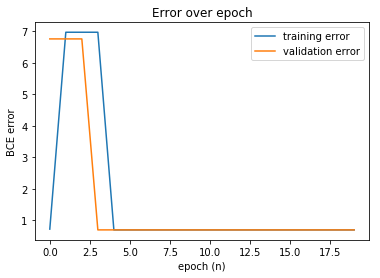

In [14]:
rap_1_seqs = io.read_text_file("data/rap1-lieb-positives.txt")
negative_seqs = io.read_fasta_file("data/yeast-upstream-1k-negative.fa")
error_name = "BCE" #BCE or MSE

seqs, labels = preprocess.reformat_pos_neg_seqs(rap_1_seqs, negative_seqs)
balanced_seqs, balanced_labels = preprocess.sample_seqs(seqs, labels)
balanced_one_hot_seqs = preprocess.one_hot_encode_seqs(balanced_seqs)

x_train, x_test, y_train, y_test = train_test_split(np.array(balanced_one_hot_seqs), \
                                                              np.array(balanced_labels))

layers = [{'input_dim': 68, 'output_dim': 32, 'activation': 'relu'},
          {'input_dim': 32, 'output_dim': 1, 'activation': 'sigmoid'}]

n = nn.NeuralNetwork(layers, 0.001, 4, 5, 20, error_name)
error_train, error_test = n.fit(x_train, np.reshape(y_train, (-1, 1)), x_test, np.reshape(y_test,
                                                                                         (-1, 1)))
plt.plot(error_train, label="training error")
plt.plot(error_test, label="validation error")
plt.title("Error over epoch")
plt.xlabel("epoch (n)")
plt.ylabel(f"{error_name} error")
plt.legend()

print(f"average reconstruction error over the validation set: {sum(error_test)/len(error_test)}")